# Sentiment Analysis in Python
Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.



# Read in Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Train.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# About Data                         
After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

In [4]:
data.shape

(50000, 2)

In [5]:
data = data.iloc[:10000,:]

In [6]:
data.shape

(10000, 2)

# Working With Label

In [7]:
data['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

<Axes: >

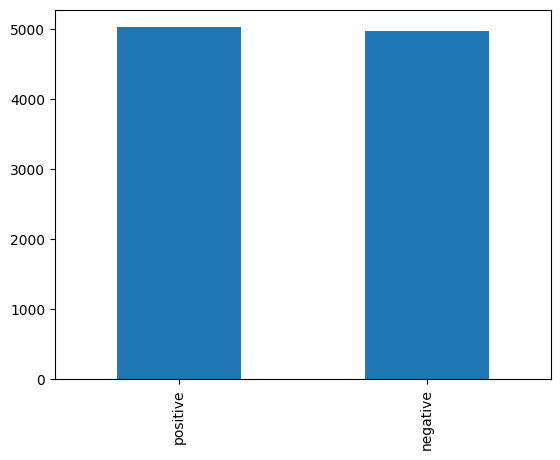

In [8]:
data['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'sentiment distribution')

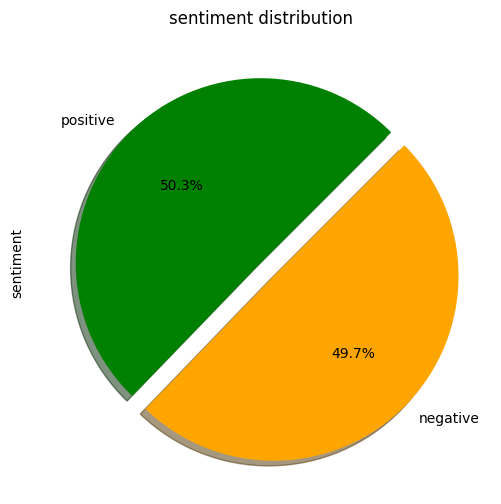

In [9]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('sentiment distribution')

# Working With Text

In [10]:
data['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

# Cleaning  steps                                       
removing HTML Tags                                        
extracting emojies    # The pattern re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)') is a regular expression                                                   used to match and extract emojis from a given text.                                                
removing special chars,puntuation,sumbols                                                 
lower casing    
removing stopwords                                
tokenization

In [11]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [33]:
# stopwords_set = set(stopwords.words('english'))
# emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

# def preprocessing(text):
#     text = re.sub('<[^>]*>', '', text)
#     emojis = emoji_pattern.findall(text)
#     text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

#     prter = PorterStemmer()
#     text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

#     return " ".join(text)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')

stopwords_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocessing(text):
    if not isinstance(text, str):  # Ensure text is a string
        text = str(text)
        
    text = re.sub('<[^>]*>', '', text)  # Remove HTML tags
    emojis = emoticon_pattern.findall(text)  # Extract emojis
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')  # Remove special chars
    
    words = [word for word in text.split() if word not in stopwords_set]  # Remove stopwords
    return " ".join(words)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world'

In [14]:
data['review'] = data['review'].apply(lambda x: preprocessing(x))

In [15]:
data['review']

0       one reviewer mentioned watching 1 oz episode y...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
3       basically there family little boy jake think t...
4       petter matteis love time money visually stunni...
                              ...                        
9995    fun entertaining movie wwii german spy julie a...
9996    give break anyone say good hockey movie know m...
9997    movie bad movie watching endless series bad ho...
9998    movie probably made entertain middle school ea...
9999    smashing film filmmaking show intense strange ...
Name: review, Length: 10000, dtype: object

# Visualizing Negative and Positive Words

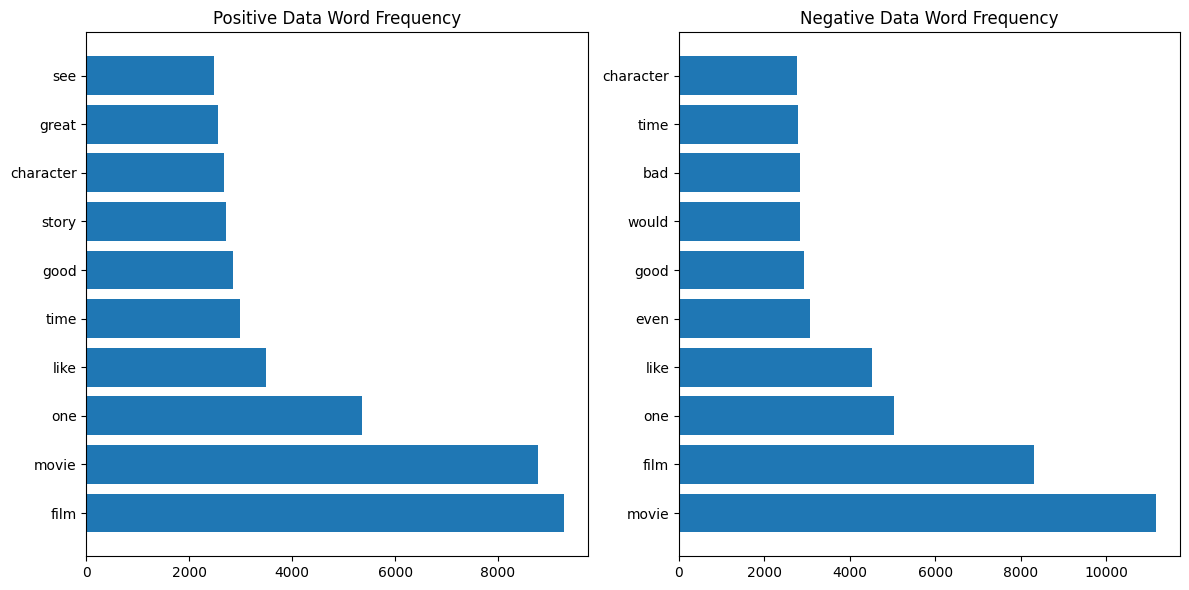

In [16]:
positivedata = data[data['sentiment'] == 'positive']
positivedata = positivedata['review']
negdata = data[data['sentiment'] == 'negative']
negdata = negdata['review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


# TF-IDF Vertorizer to convert the raw documents into feature matrix 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)

# Training Machine Learning Model for Sentiment Analysis
Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)  # Ensure training data is used to fit the vectorizer


AttributeError: lower not found

In [19]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   31.3s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   47.2s finished


# Accuracy

In [20]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8698


# Pickle files

In [21]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

# prediction

In [22]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('Bed !')

In [23]:
# if prediction ==positive :
#     print("positive comment")
# else:
#     print("negative comment")
    

In [24]:
prediction

'positive'

In [25]:
data['review'][9995]

'fun entertaining movie wwii german spy julie andrew falling love american pilot rock hudson trying get secret reason attacked critic shunned public 1970i cant see beautifully shot wonderful costume interior exciting aerial dogfight also andrew striptease strictly pg material singing beautiful songwhistling dark movie problem andrew hudson get along shooting thisand show love scene lack spark zero sexual chemistry still turn ok performance film little long even 105 min director cut saw get way dark serious end still worth catching try seeing director cutthe one run half hour longer'

In [26]:
data['review'][0]

'one reviewer mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison b

In [27]:
sentiment = clf.predict_proba(vectorized)[0][1]  # Probability of positive sentiment
if sentiment > 0.6:
    sentiment = 'positive'
else:
    sentiment = 'negative'


NameError: name 'vectorized' is not defined

In [28]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True